In [140]:
#importing neccesarry modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

### Preprocessing

In [141]:
#get csv to df
df = pd.read_csv('black_friday_data_kaggle.csv', error_bad_lines=False)

In [142]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", "4")

dummy_columns = ['Gender','Age','City_Category']
df = pd.concat([df, pd.get_dummies(df[dummy_columns])], axis=1)

df = df.drop(dummy_columns, axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [112]:
scaler = MinMaxScaler()

df[['Occupation', 'Stay_In_Current_City_Years','Purchase']] = scaler.fit_transform(
    df[['Occupation', 'Stay_In_Current_City_Years','Purchase']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [113]:
df.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0.5,0.5,0,-1,NaN,NaN,0.344255,1,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0.5,0.5,0,1,6.0,14.0,0.631519,1,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0.5,0.5,0,-1,NaN,NaN,0.052027,1,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0.5,0.5,0,-1,14.0,NaN,0.036676,1,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,0.8,1.0,0,8,NaN,NaN,0.327389,0,...,0,0,0,0,0,0,1,0,0,1


In [114]:
#saving product IDs for test set
productids = df_final[df_final.Product_Category_1 == -1]

In [116]:
# Transform data to have rows at a product id level
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2',
                                                      'Product_Category_3']].fillna(df[['Product_Category_2',
                                                                                        'Product_Category_3']].mean())
df_product1 = df.groupby(by='Product_ID', as_index=False).mean()
df_product1 = df_product1.drop('User_ID', axis=1)
df_product2 = df.groupby(by='Product_ID', as_index=False).agg({'User_ID': pd.Series.nunique})
df_product2 = df_product2.drop('Product_ID',axis=1)

df_final = pd.concat([df_product1, df_product2], axis=1, sort=False)

cat = ['User_ID','Product_Category_2','Product_Category_3']

df_final[cat] = scaler.fit_transform(df_final[cat])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [117]:
df_final.head()

,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,User_ID
0,P00000142,0.398628,0.448230,0.375221,-1.0,0.125000,0.133333,0.460906,0.302655,0.697345,...,0.226549,0.385841,0.195575,0.071681,0.049558,0.022124,0.215929,0.379646,0.404425,0.607970
1,P00000242,0.379111,0.479111,0.369272,-1.0,0.125000,0.400000,0.436040,0.239892,0.760108,...,0.231806,0.350404,0.210243,0.067385,0.070081,0.018868,0.221024,0.477089,0.301887,0.199246
2,P00000342,0.393487,0.444328,0.399160,-1.0,0.750000,0.644656,0.215130,0.281513,0.718487,...,0.201681,0.390756,0.147059,0.054622,0.096639,0.063025,0.260504,0.411765,0.327731,0.127625
3,P00000442,0.342391,0.451087,0.413043,-1.0,0.375000,0.644656,0.193908,0.500000,0.500000,...,0.195652,0.500000,0.184783,0.043478,0.032609,0.021739,0.391304,0.413043,0.195652,0.049004
4,P00000542,0.361986,0.503425,0.308219,-1.0,0.490134,0.644656,0.220151,0.342466,0.657534,...,0.226027,0.376712,0.219178,0.047945,0.061644,0.006849,0.287671,0.472603,0.239726,0.078083


In [118]:
df_final = df_final.drop('Product_ID', axis=1)

In [119]:
df_final.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,User_ID
0,0.398628,0.448230,0.375221,-1.0,0.125000,0.133333,0.460906,0.302655,0.697345,0.048673,0.226549,0.385841,0.195575,0.071681,0.049558,0.022124,0.215929,0.379646,0.404425,0.607970
1,0.379111,0.479111,0.369272,-1.0,0.125000,0.400000,0.436040,0.239892,0.760108,0.051213,0.231806,0.350404,0.210243,0.067385,0.070081,0.018868,0.221024,0.477089,0.301887,0.199246
2,0.393487,0.444328,0.399160,-1.0,0.750000,0.644656,0.215130,0.281513,0.718487,0.046218,0.201681,0.390756,0.147059,0.054622,0.096639,0.063025,0.260504,0.411765,0.327731,0.127625
3,0.342391,0.451087,0.413043,-1.0,0.375000,0.644656,0.193908,0.500000,0.500000,0.021739,0.195652,0.500000,0.184783,0.043478,0.032609,0.021739,0.391304,0.413043,0.195652,0.049004
4,0.361986,0.503425,0.308219,-1.0,0.490134,0.644656,0.220151,0.342466,0.657534,0.061644,0.226027,0.376712,0.219178,0.047945,0.061644,0.006849,0.287671,0.472603,0.239726,0.078083


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139B95E1390>,
      dtype=object)

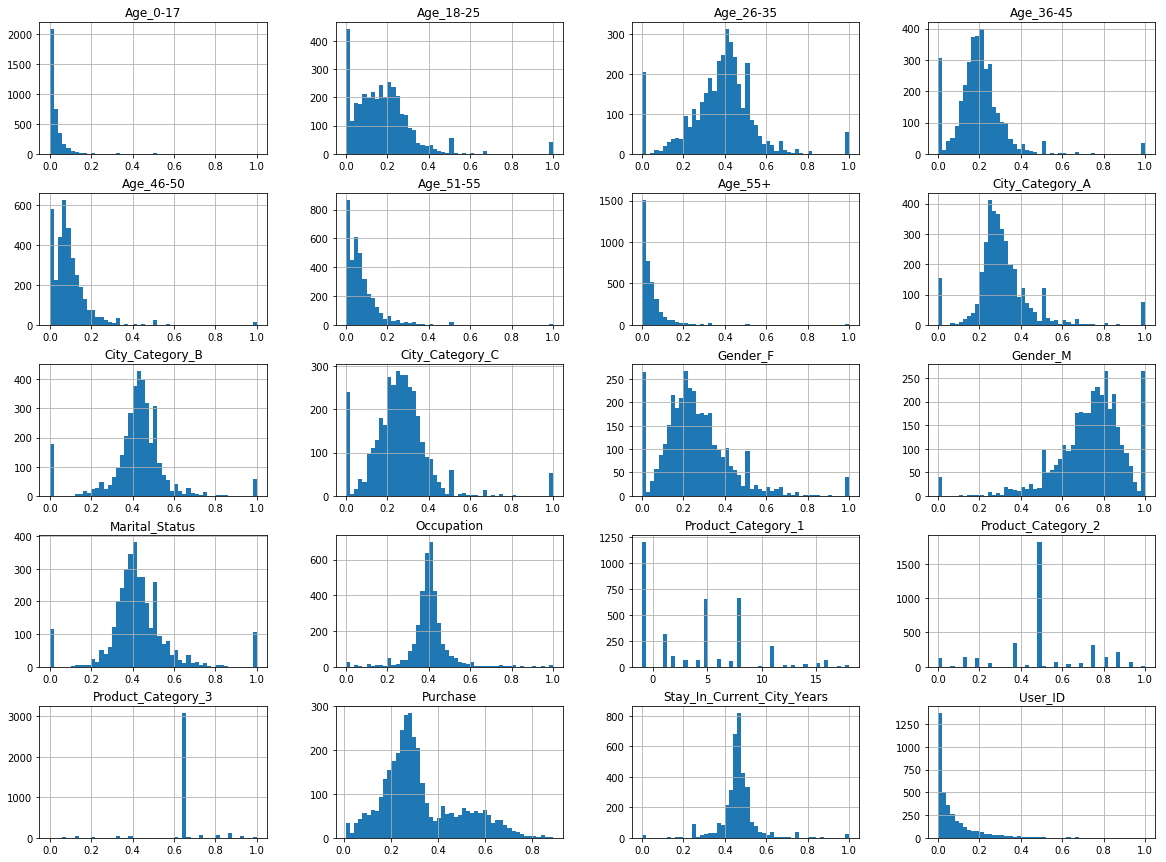

In [139]:
df_final.hist(bins=50, figsize=(20,15))

In [121]:
df_train = df_final[df_final.Product_Category_1 != -1]
df_test = df_final[df_final.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

# Creating Train, Validation and Test

In [122]:
X = df_train.loc[:, df_train.columns != 'Product_Category_1']
y = df_train.loc[:, df_train.columns == 'Product_Category_1']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    #stratify=y, 
                                                    test_size=0.25)

In [126]:
X_train.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,User_ID
2170,0.408523,0.488636,0.409091,0.490134,0.644656,0.166322,0.250000,0.750000,0.000000,0.068182,0.693182,0.204545,0.034091,0.000000,0.000000,0.409091,0.465909,0.125000,0.046850
2036,0.379706,0.460294,0.329412,0.687500,0.866667,0.134828,0.229412,0.770588,0.088235,0.311765,0.382353,0.135294,0.041176,0.029412,0.011765,0.258824,0.476471,0.264706,0.091007
3246,0.369403,0.496269,0.462687,0.875000,0.644656,0.213880,0.179104,0.820896,0.000000,0.089552,0.373134,0.238806,0.179104,0.104478,0.014925,0.283582,0.373134,0.343284,0.035541
3489,0.401639,0.504098,0.377049,0.490134,0.644656,0.458144,0.196721,0.803279,0.098361,0.229508,0.409836,0.147541,0.049180,0.032787,0.032787,0.229508,0.409836,0.360656,0.032310
2976,0.318750,0.281250,0.625000,0.490134,0.644656,0.265767,0.375000,0.625000,0.000000,0.000000,0.000000,0.250000,0.125000,0.375000,0.250000,0.000000,0.750000,0.250000,0.003770


In [127]:
X_test = df_test.loc[:, df_train.columns != 'Product_Category_1']
y_test = df_test.loc[:, df_train.columns == 'Product_Category_1']

# SVM Training

In [128]:
from sklearn.svm import SVC

### Hyperparameter Tunning (Only run once to find best parameters)

In [ ]:
clf_svm = SVC()

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1,2,3,4,5,6,7,8,9,10,100,1000], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5], 'degree':[3,4,5,6,7,8]}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(clf_svm, parameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train.values.ravel())

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

print('Accuracy on training set', 100*clf.score(X_train, y_train.values.ravel()), '%')

### Building SVM with best parameters found previously

In [129]:
clf_svm = SVC(C = 100, kernel='rbf', gamma=0.4)
clf_svm.fit(X_train, y_train.values.ravel()) 

print('Accuracy on training set', 100*clf_svm.score(X_train, y_train.values.ravel()), '%')

print('Accuracy on validation set', 100*clf_svm.score(X_val, y_val.values.ravel()), '%')

Accuracy on training set 86.09271523178808 %
Accuracy on validation set 71.8543046357616 %


# Using Trained Model in Test Data

In [130]:
df_test = df_test.drop(columns='Product_Category_1')

In [131]:
df_test.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,User_ID
0,0.398628,0.448230,0.375221,0.125000,0.133333,0.460906,0.302655,0.697345,0.048673,0.226549,0.385841,0.195575,0.071681,0.049558,0.022124,0.215929,0.379646,0.404425,0.607970
1,0.379111,0.479111,0.369272,0.125000,0.400000,0.436040,0.239892,0.760108,0.051213,0.231806,0.350404,0.210243,0.067385,0.070081,0.018868,0.221024,0.477089,0.301887,0.199246
2,0.393487,0.444328,0.399160,0.750000,0.644656,0.215130,0.281513,0.718487,0.046218,0.201681,0.390756,0.147059,0.054622,0.096639,0.063025,0.260504,0.411765,0.327731,0.127625
3,0.342391,0.451087,0.413043,0.375000,0.644656,0.193908,0.500000,0.500000,0.021739,0.195652,0.500000,0.184783,0.043478,0.032609,0.021739,0.391304,0.413043,0.195652,0.049004
4,0.361986,0.503425,0.308219,0.490134,0.644656,0.220151,0.342466,0.657534,0.061644,0.226027,0.376712,0.219178,0.047945,0.061644,0.006849,0.287671,0.472603,0.239726,0.078083


In [132]:
predict_test = clf_svm.predict(df_test)

In [133]:
df_test['Product_Category_1'] = predict_test

# Ignore Below

In [42]:
major = pd.read_csv('FinalPredictions.csv')

In [101]:
major.to_csv("finalsub.csv", sep=',')